<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/levelup.png' width=240/></center>

<center>모델을 빨리 만드는 것이 목적이 아닙니다. 천천히 생각하고 정리하면서 구문을 정성껏 작성하세요.</center>

# 과제: 이동 통신사 고객 이탈 예측

<img src = "https://github.com/Jangrae/img/blob/master/mobile.png?raw=true" width=900 align="left"/>

# 실습 안내

**1) 실습 방법**

- 데이터 전처리와 탐색 보다는 모델 코딩에 중점을 둡니다.
- 기존 소스에서 복사해 붙여넣기 하지 않고 다시 코딩합니다.
- 실습 후 시간이 남으면 데이터 탐색과 성능 튜닝을 진행합니다. 
- 모든 작업에는 주석을 가능한 충분히 답니다.
- 입력을 요구한 **(작성)**, **(의견)** 부분을 충분히 채웁니다.

**2) 실습 내용**

- 대상 데이터를 읽어와 탐색하며 이해합니다.
- 결측치를 확인하고 처리합니다.
- 범주형 변수를 구분하고 가변수화를 진행합니다.
- 연속형 변수를 구분하고 정규화를 진행합니다.
- 데이터를 학습용 데이터와 평가용 데이터로 분리합니다.
- 다양한 머신러닝 알고리즘을 사용해 모델링합니다.
- 성능 평가 결과를 이해하고 설명합니다.
- 더 나은 성능을 보이도록 특정 모델을 튜닝합니다.

**3) 데이터 정보**

- ID: 고객ID
- COLLEGE: 대학졸업 여부(1,0)
- INCOME: 연 수입액
- OVERAGE: 월 초과사용 시간(분)
- LEFTOVER: 월 사용 잔여시간(분)
- HOUSE: 집 가격
- HANDSET_PRICE: 핸드폰 가격
- OVER_15MINS_CALLS_PER_MONTH: 월 평균 장기통화(15분 이상) 횟수
- AVERAGE_CALL_DURATION: 평균 통화시간(분)
- REPORTED_SATISFACTION: 만족도 설문
- REPORTED_USAGE_LEVEL: 사용 수준 설문
- CONSIDERING_CHANGE_OF_PLAN: 변경 계획 설문
- CHURN: 이탈여부(1 : 이탈, 0 : 잔류)

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [2]:
# 데이터 읽어오기
# path = 'https://raw.githubusercontent.com/Jangrae/csv/master/mobile.csv'
path = 'https://bit.ly/MobileChurnFile'
data = pd.read_csv(path)

# 2.데이터 탐색

- 다양한 탐색 및 분석 방법을 사용해 대상 데이터를 충분히 이해합니다.

**1) 상/하위 데이터 확인**

- 데이터 앞/뒤를 살펴 데이터를 간단히 확인합니다.

In [3]:
# 상위 데이터 확인
data.head()

,ID,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,544,1,47711,183,17,730589.0,192,19,5,unsat,little,considering,0
1,689,0,74132,191,43,535092.0,349,15,2,unsat,very_little,no,1
2,3134,1,150419,0,14,204004.0,682,0,6,unsat,very_high,considering,0
3,12523,0,159567,0,58,281969.0,634,1,1,very_unsat,very_high,never_thought,0
4,2374,1,23392,0,0,216707.0,233,0,15,unsat,very_little,no,1


In [4]:
# 하위 데이터 확인
data.tail()

,ID,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
17995,18614,0,31079,200,40,NaN,181,20,11,unsat,little,actively_looking_into_it,0
17996,9704,0,137194,63,0,NaN,787,3,11,very_unsat,little,no,1
17997,13354,0,82931,0,77,NaN,232,0,2,very_unsat,very_little,never_thought,0
17998,2421,0,124391,0,19,NaN,862,0,2,unsat,very_high,no,0
17999,2553,0,104849,223,5,NaN,463,21,5,very_unsat,little,considering,1


**2) 변수 정보 확인**

- 변수 이름, 값 개수, 데이터 형식등을 확인합니다.

In [5]:
# 열 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           18000 non-null  int64  
 1   COLLEGE                      18000 non-null  int64  
 2   INCOME                       18000 non-null  int64  
 3   OVERAGE                      18000 non-null  int64  
 4   LEFTOVER                     18000 non-null  int64  
 5   HOUSE                        17785 non-null  float64
 6   HANDSET_PRICE                18000 non-null  int64  
 7   OVER_15MINS_CALLS_PER_MONTH  18000 non-null  int64  
 8   AVERAGE_CALL_DURATION        18000 non-null  int64  
 9   REPORTED_SATISFACTION        17962 non-null  object 
 10  REPORTED_USAGE_LEVEL         18000 non-null  object 
 11  CONSIDERING_CHANGE_OF_PLAN   18000 non-null  object 
 12  CHURN                        18000 non-null  int64  
dtypes: float64(1), i

**3) 기초통계정보 확인**

- 기초통계정보를 통해 숫자 데이터를 갖는 변수들 값 분포를 확인합니다.

In [6]:
# 기초 통계 정보
data.describe()

,ID,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,CHURN
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,17785.000000,18000.000000,18000.000000,18000.000000,18000.000000
mean,10007.858833,0.502722,80314.400278,86.014833,23.995500,492950.532696,390.096667,8.012778,5.990944,0.492722
std,5767.818549,0.500006,41703.420130,85.963981,26.860363,252175.173507,214.239639,8.932820,4.398894,0.499961
min,2.000000,0.000000,20007.000000,-2.000000,0.000000,150015.000000,130.000000,0.000000,1.000000,0.000000
25%,5010.750000,0.000000,42151.500000,0.000000,0.000000,263876.000000,219.000000,1.000000,2.000000,0.000000
50%,10007.500000,1.000000,75501.500000,59.000000,14.500000,452277.000000,326.000000,4.000000,5.000000,0.000000
75%,14999.250000,1.000000,116082.250000,179.000000,42.000000,701460.000000,536.000000,15.000000,10.000000,1.000000
max,20000.000000,1.000000,159983.000000,335.000000,89.000000,999970.000000,899.000000,29.000000,15.000000,1.000000


**4) 결측치 확인**

- 결측치가 있는지 확인합니다.

In [7]:
# 결측치 확인
data.isnull().sum()

ID                               0
COLLEGE                          0
INCOME                           0
OVERAGE                          0
LEFTOVER                         0
HOUSE                          215
HANDSET_PRICE                    0
OVER_15MINS_CALLS_PER_MONTH      0
AVERAGE_CALL_DURATION            0
REPORTED_SATISFACTION           38
REPORTED_USAGE_LEVEL             0
CONSIDERING_CHANGE_OF_PLAN       0
CHURN                            0
dtype: int64

**5) 상관관계 확인**

5-1) 변수들 간의 상관관계를 확인합니다.

In [8]:
# 상관분석
data.corr()

,ID,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,CHURN
ID,1.000000,-0.006353,0.002085,-0.005713,0.007089,0.012027,-0.010126,0.000112,-0.007062,0.003499
COLLEGE,-0.006353,1.000000,0.009719,-0.005156,-0.006914,-0.001793,0.009559,-0.010606,-0.000507,0.016748
INCOME,0.002085,0.009719,1.000000,0.001349,0.009729,-0.011239,0.725867,0.003027,-0.009954,0.094168
OVERAGE,-0.005713,-0.005156,0.001349,1.000000,-0.003057,0.002142,-0.001158,0.771545,0.001542,0.237797
LEFTOVER,0.007089,-0.006914,0.009729,-0.003057,1.000000,0.007295,0.006251,-0.009176,-0.659437,0.060022
HOUSE,0.012027,-0.001793,-0.011239,0.002142,0.007295,1.000000,-0.007122,0.006026,-0.007513,-0.211020
HANDSET_PRICE,-0.010126,0.009559,0.725867,-0.001158,0.006251,-0.007122,1.000000,0.002070,-0.003832,0.086517
OVER_15MINS_CALLS_PER_MONTH,0.000112,-0.010606,0.003027,0.771545,-0.009176,0.006026,0.002070,1.000000,0.006812,0.206578
AVERAGE_CALL_DURATION,-0.007062,-0.000507,-0.009954,0.001542,-0.659437,-0.007513,-0.003832,0.006812,1.000000,-0.006333
CHURN,0.003499,0.016748,0.094168,0.237797,0.060022,-0.211020,0.086517,0.206578,-0.006333,1.000000


5-2) 변수들 간의 상관관계를 시각화해 확인합니다. figsize=(10, 8) 정도로 설정합니다.

* CHURN과의 상관관계 값이 0.2 이상인 항목들에 대해서 시각화 표시

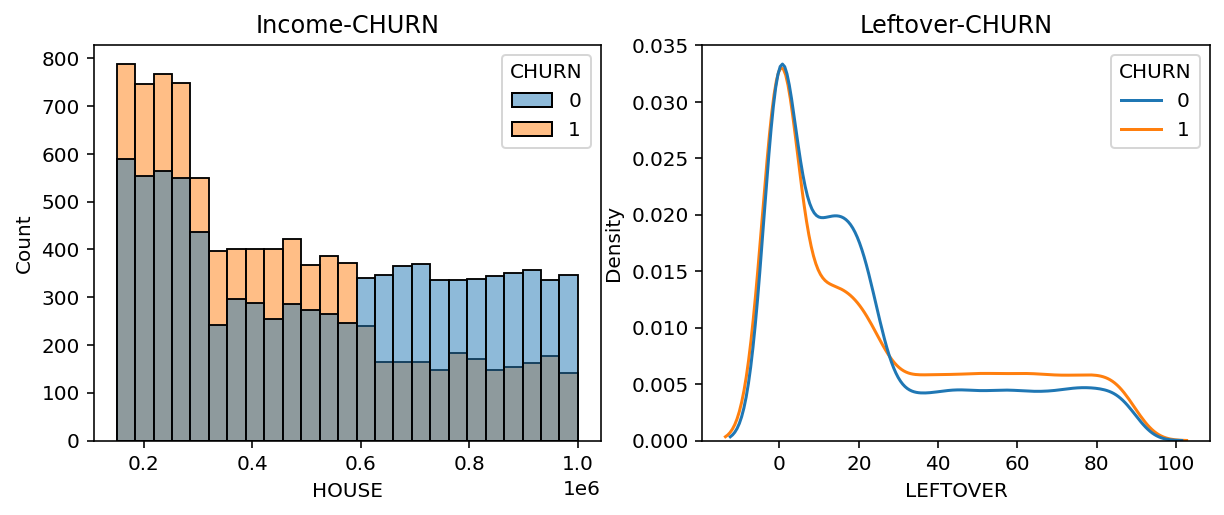

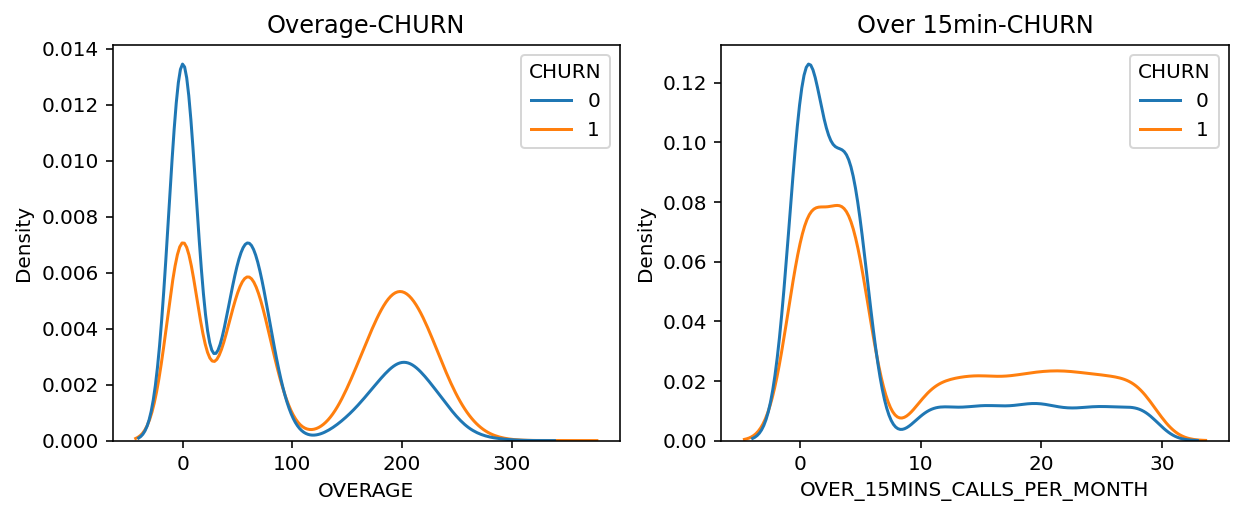

In [18]:
# 상관관계 시각화
plt.figure(figsize=(10, 8))
plt.subplot(2,2,1)
plt.title('Income-CHURN')
sns.histplot(data=data, x='HOUSE', bins=25, hue='CHURN')
plt.subplot(2,2,2)
plt.title('Leftover-CHURN')
sns.kdeplot(data=data, x='LEFTOVER', hue='CHURN',common_norm=False)
plt.show()
plt.figure(figsize=(10, 8))
plt.subplot(2,2,3)
plt.title('Overage-CHURN')
sns.kdeplot(data=data, x='OVERAGE', hue='CHURN', common_norm=False)
plt.subplot(2,2,4)
plt.title('Over 15min-CHURN')
sns.kdeplot(data=data, x='OVER_15MINS_CALLS_PER_MONTH', hue='CHURN', common_norm=False)
plt.show()


- (의견) 집값이 저렴한 사람들은 경제력이 충분하지 못할 가능성이 있고, 통신비에 민감한 사람이 이탈하는 것 같다.
- (의견) 초과사용시간 뿐만 아니라 이용시간이 많은 사람들이 이탈을 많이 하는 것을 보면, 단순히 대용량의 고가 요금제로 유도하는 것이 해결책이 아닐 수도 있다.

**6) 범주값 변수 확인**

- 범주형 변수를 식별한 후 그 변수들이 어떤 범주값을 몇 개씩 갖는지 확인합니다.

In [23]:
# 범주값 개수 확인
print('Satisfaction :\n',data['REPORTED_SATISFACTION'].value_counts())
print('=' * 40)
print('Usage level :\n',data['REPORTED_USAGE_LEVEL'].value_counts())
print('=' * 40)
print('Change plan :\n',data['CONSIDERING_CHANGE_OF_PLAN'].value_counts())
print('=' * 40)
print('College :\n',data['COLLEGE'].value_counts())
print('=' * 40)
print('CHURN :\n',data['CHURN'].value_counts())

Satisfaction :
 very_unsat    7072
very_sat      4562
unsat         3590
avg           1806
sat            932
Name: REPORTED_SATISFACTION, dtype: int64
Usage level :
 little         7076
very_high      4636
very_little    3594
high           1812
avg             882
Name: REPORTED_USAGE_LEVEL, dtype: int64
Change plan :
 considering                 7141
actively_looking_into_it    4453
no                          3644
never_thought               1804
perhaps                      958
Name: CONSIDERING_CHANGE_OF_PLAN, dtype: int64
College :
 1    9049
0    8951
Name: COLLEGE, dtype: int64
CHURN :
 0    9131
1    8869
Name: CHURN, dtype: int64


**7) 주요 변수 확인**

7-1) CHURN 변수 값 분포를 막대그래프로 시각화해 확인합니다.

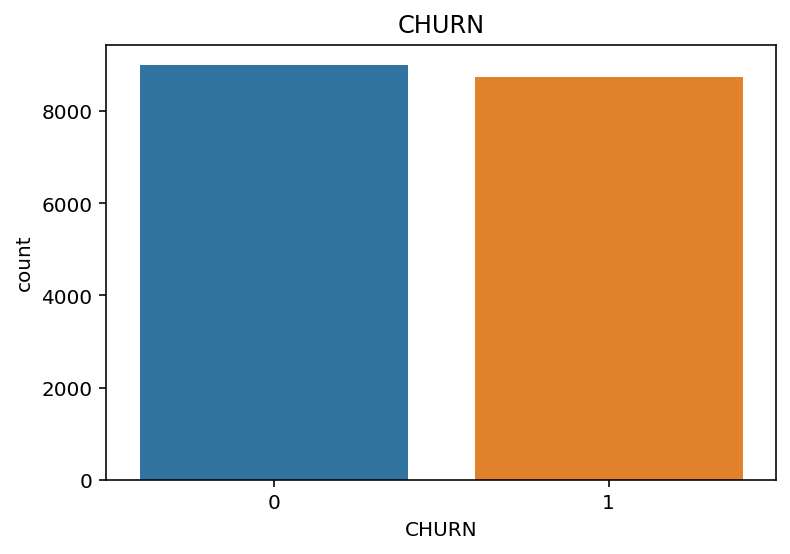

In [82]:
# CHURN 값 분포
sns.countplot(data['CHURN'])
plt.title('CHURN')
plt.show()

- (의견) 이탈 비율이 생각보다 높은 것 같다.
- (의견) 설문조사 결과랑 이탈 여부를 비교해 보면 불만이 있지만 그냥 쓰는 사람도 있는 것 같다.

7-2) CHURN 변수 값으로 구분해 INCOME 변수 값의 분포를 히스토그램으로 확인합니다.

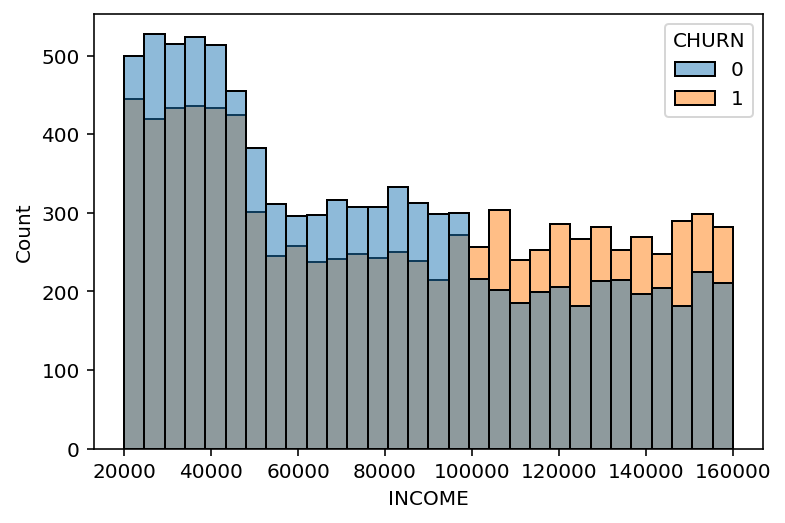

In [27]:
# INCOME --> CHURN 값 분포
sns.histplot(x=data['INCOME'], hue=data['CHURN'], bins=30)
plt.show()

- (의견) 경제적으로 여유가 많은 사람들이 이탈을 많이 하는 것 같다.
- (의견) 집값의 경우에는 집값이 60만 달러 미만인 경우 이탈율이 높았는데, 그렇다면 주로 수입은 많은데 집값이 싼 사람들이 이탈하는 건가?

7-3) CHURN 변수 값으로 구분해 OVERAGE 변수 값의 분포를 히스토그램으로 확인합니다.

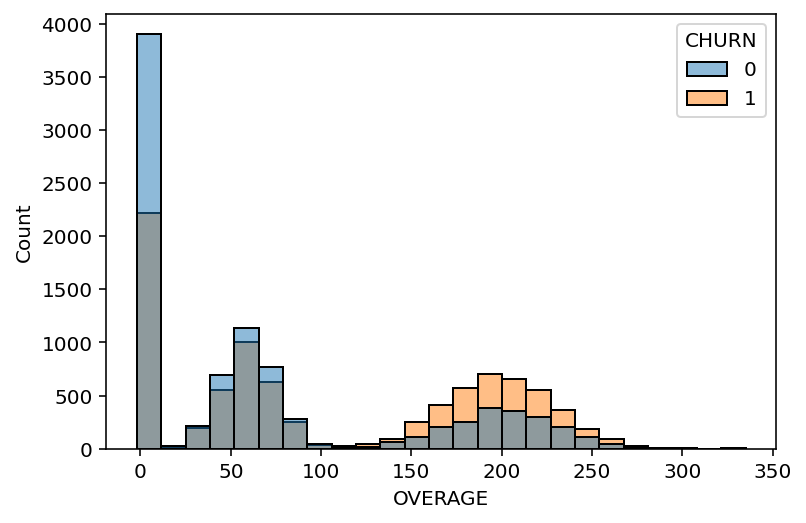

In [29]:
# OVERAGE --> CHURN 값 분포
sns.histplot(data=data, x='OVERAGE', bins=25, hue='CHURN')
plt.show()

- (의견) 통신 서비스 이용 패턴이 세 그룹으로 나뉘는 것 같다(초과시간 없음, 초과시간 50~100분, 초과시간 150분 이상).
- (의견) 위에서 조사한 내용과 종합해 봤을 때, 많이 쓰는 사람들이 이탈하는 걸 보면 대용량 요금제 자체에 구조적인 문제가 있는 것 같다.

- 예를 들면 통신 품질 저하 현상이 종종 발생하거나, 고급 요금제들도 기본 사용량이 적은 대신 초과 이용료가 높게 구성되어 있는 등...

7-4) CHURN 변수 값으로 구분해 HOUSE 변수 값의 분포를 히스토그램으로 확인합니다.

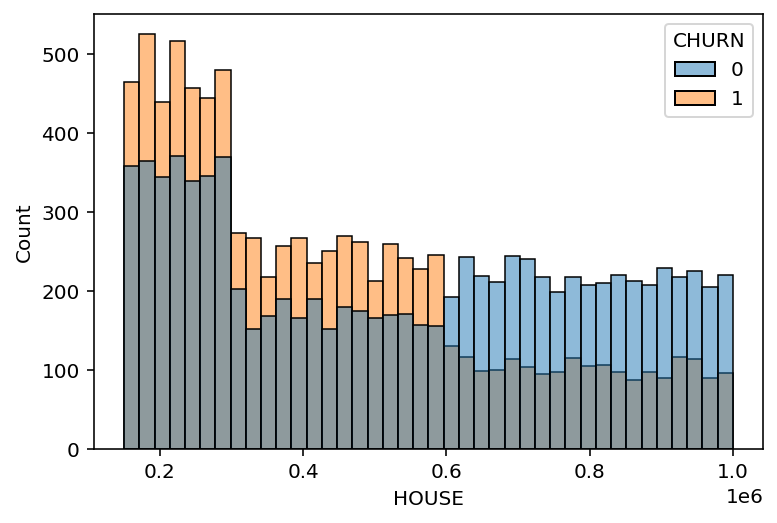

In [30]:
# HOUSE --> CHURN 값 분포
sns.histplot(data=data, x='HOUSE', bins=40, hue='CHURN')
plt.show()

- (의견) 위에는 소득이 많을수록 이탈율이 높다고 했는데 집값은 그 반대다.
- (의견) 이탈자들의 특징이 소득은 높은데 집값은 저렴안 사람인지, 아니면 집값은 높은데 소득이 적은 사람(하우스 푸어)들인지 알아볼 필요가 있다.

7-5) CHURN 변수 값으로 구분해 HANDSET_PRICE 변수 값의 분포를 히스토그램으로 확인합니다.

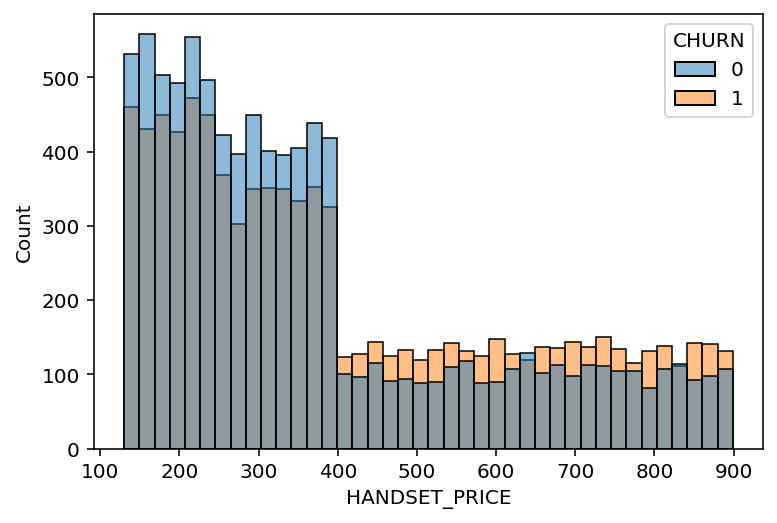

In [31]:
# HANDSET_PRICE --> CHURN 값 분포
sns.histplot(data=data, x='HANDSET_PRICE', bins=40, hue='CHURN')
plt.show()

- (의견) 고가의 휴대폰을 쓰는 사람들을 위한 프로모션이 부족한 것 같다.
- (의견) 다만 전 가격대 구간에서 이탈-잔류 비율 차이가 극단적으로 갈리지는 않는다.

# 3.데이터 준비


- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) 불필요한 열 제거**

- 불필요한 ID 열을 제거합니다.

In [33]:
# 열 제거
data.drop('ID', axis=1, inplace=True)

# 확인
data.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,47711,183,17,730589.0,192,19,5,unsat,little,considering,0
1,0,74132,191,43,535092.0,349,15,2,unsat,very_little,no,1
2,1,150419,0,14,204004.0,682,0,6,unsat,very_high,considering,0
3,0,159567,0,58,281969.0,634,1,1,very_unsat,very_high,never_thought,0
4,1,23392,0,0,216707.0,233,0,15,unsat,very_little,no,1


**2) 결측치 제거**

- 결측치자 있는 행은 얼마 안되니 모두 제거합니다.

In [34]:
# 결측치 제거
data.dropna(axis=0, inplace=True)

# 확인
data.isnull().sum()

COLLEGE                        0
INCOME                         0
OVERAGE                        0
LEFTOVER                       0
HOUSE                          0
HANDSET_PRICE                  0
OVER_15MINS_CALLS_PER_MONTH    0
AVERAGE_CALL_DURATION          0
REPORTED_SATISFACTION          0
REPORTED_USAGE_LEVEL           0
CONSIDERING_CHANGE_OF_PLAN     0
CHURN                          0
dtype: int64

**3) x, y 분리**

- CHURN 변수가 Target입니다.
- x, y가 분리된 이후부터 y는 절대로 건드지지 않아야 합니다.

In [35]:
# target 확인
target = 'CHURN'

# 데이터 분리
x = data.drop(target, axis=1)
y = data[target]

**4) 가변수화**

- 왜 x의 다음 변수들이 가변수화 대상이 되는지 파악한 후 가변수화를 진행합니다.
    - REPORTED_SATISFACTION, REPORTED_USAGE_LEVEL, CONSIDERING_CHANGE_OF_PLAN 

In [36]:
# 가변수화
cols = ['REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL', 'CONSIDERING_CHANGE_OF_PLAN']

x = pd.get_dummies(x, columns=cols)
# 확인
x

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION_avg,REPORTED_SATISFACTION_sat,...,REPORTED_USAGE_LEVEL_avg,REPORTED_USAGE_LEVEL_high,REPORTED_USAGE_LEVEL_little,REPORTED_USAGE_LEVEL_very_high,REPORTED_USAGE_LEVEL_very_little,CONSIDERING_CHANGE_OF_PLAN_actively_looking_into_it,CONSIDERING_CHANGE_OF_PLAN_considering,CONSIDERING_CHANGE_OF_PLAN_never_thought,CONSIDERING_CHANGE_OF_PLAN_no,CONSIDERING_CHANGE_OF_PLAN_perhaps
0,1,47711,183,17,730589.0,192,19,5,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,74132,191,43,535092.0,349,15,2,0,0,...,0,0,0,0,1,0,0,0,1,0
2,1,150419,0,14,204004.0,682,0,6,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0,159567,0,58,281969.0,634,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,23392,0,0,216707.0,233,0,15,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17780,0,46760,230,0,552976.0,224,19,11,0,0,...,0,0,0,1,0,1,0,0,0,0
17781,1,50889,29,40,199087.0,332,4,2,0,0,...,0,0,0,0,1,1,0,0,0,0
17782,1,106809,43,6,199932.0,436,4,5,0,0,...,0,1,0,0,0,0,0,0,1,0
17783,0,75906,48,62,363613.0,372,3,2,0,0,...,0,0,0,0,1,0,1,0,0,0


**5) 학습용, 평가용 데이터 분리**

- 학습용, 평가용 데이터를 7:3으로 분리합니다.
- random_state 옵션 값은 2022를 지정합니다.

In [37]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.3, random_state=2022)

# 4.모델링

- 본격적으로 모델을 선언하고 학습하고 평가하는 과정을 진행합니다.
- 다양한 알고리즘으로 모델을 만들고 각각의 성능을 확인합니다.
- 성능 평가는 confusion_matrix, classification_report를 사용합니다.
- 각 알고리즘별로 요구되는 내용을 숙지하면서 모델링을 진행합니다.

## 4.1.Decision Tree

### 4.1.1.모델링

- Decision Tree 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 random_state=2022을 지정합니다.
- max_depth 값을 설정하시 마세요.(이후에 설정함)

In [38]:
# 1단계: 불러오기
from sklearn.tree import DecisionTreeClassifier


In [51]:
# 2단계: 선언하기(max_depth=5)
model = DecisionTreeClassifier(max_depth=5,random_state=2022)

In [52]:
# 3단계: 학습하기
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=2022)

In [53]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

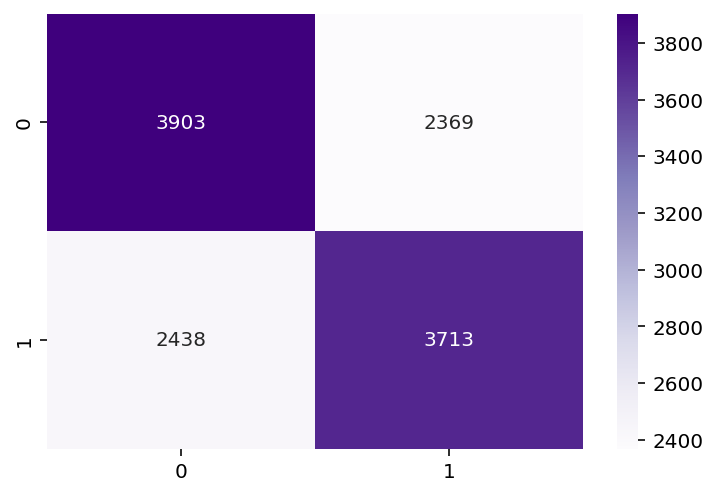

----------------------------------------
              precision    recall  f1-score   support

           0       0.62      0.62      0.62      6272
           1       0.61      0.60      0.61      6151

    accuracy                           0.61     12423
   macro avg       0.61      0.61      0.61     12423
weighted avg       0.61      0.61      0.61     12423

----------------------------------------
Accuracy : 0.6130564275939789


In [46]:
# 5단계: 평가하기
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# 시각화 자료
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='g',cmap='Purples')
plt.show()
# 수치화 자료
print('-'*40)
print(classification_report(y_test,y_pred))
print('-'*40)
print('Accuracy :',accuracy_score(y_test,y_pred))

### 4.1.2.트리 시각화 #1

1) max_depth를 설정하지 않는 상태의 accuracy score는 얼마인가요? 0.61

2) max_depth를 설정하지 않는 모델에서 plot_tree를 사용해 시각화해 확인합니다.(많은 시간 소요됨, 인내가 필요)

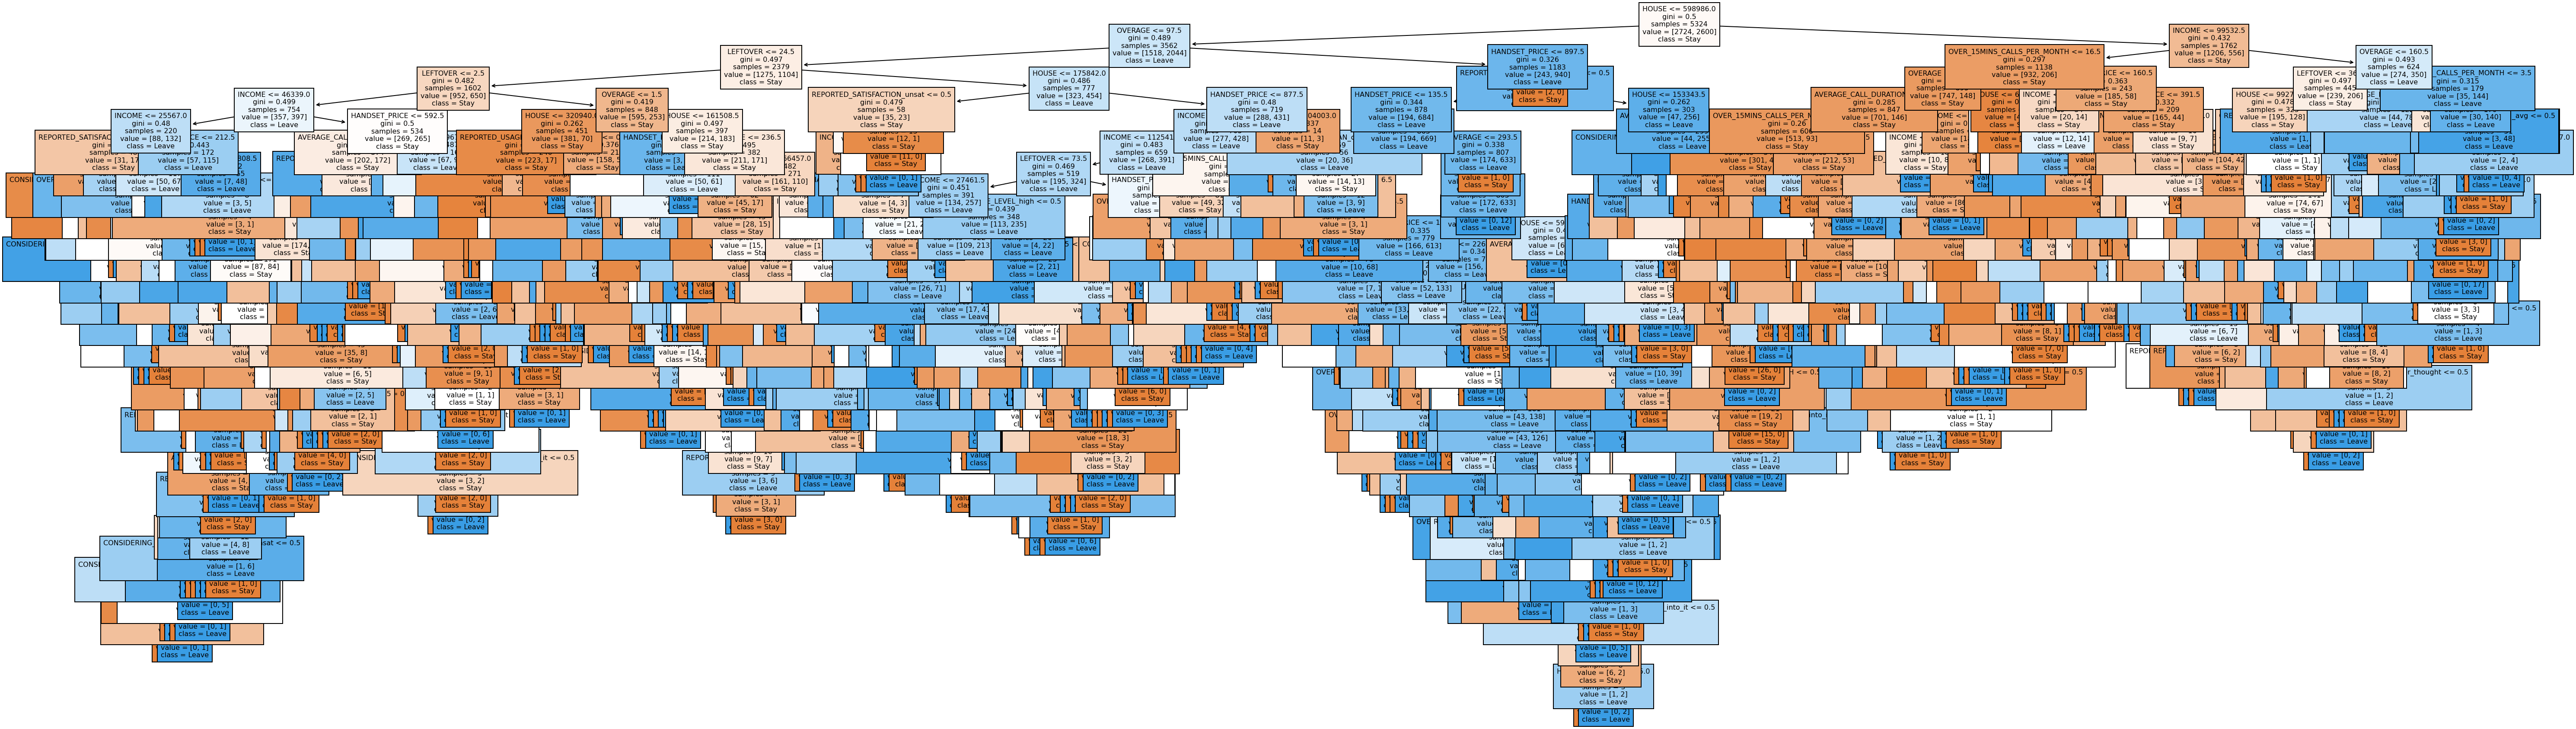

In [44]:
# 트리 시각화
from sklearn.tree import plot_tree

plt.figure(figsize=(50, 15))
plot_tree(model, filled=True, class_names=['Stay', 'Leave'], feature_names=list(x), fontsize=8)
plt.show()

- (의견) max_depth를 적절하게 지정하지 않으니까 시간 및 메모리 자원 낭비가 심하고 정확도도 떨어지는 것 같다.
- (의견) 이 모델은 불순도가 상당히 높아서 실제 환경에 적용하기에는 어려움이 있다.

### 4.1.3.변수 중요도 확인 #1

- 모델의 feature_importances_ 속성으로 변수들(Features) 중요도를 확인합니다.

In [48]:
# 중요도 확인
model.feature_importances_


array([0.01908159, 0.17250613, 0.15317855, 0.09461133, 0.1859927 ,
       0.11264578, 0.05708919, 0.04225437, 0.0111157 , 0.00427299,
       0.0103244 , 0.00688237, 0.01184513, 0.00683477, 0.00514506,
       0.01702505, 0.01079553, 0.02008017, 0.01266748, 0.01434334,
       0.01566035, 0.00987123, 0.00577679])

- 변수 중요도를 가로막대 그래프로 시각화해 확인합니다.

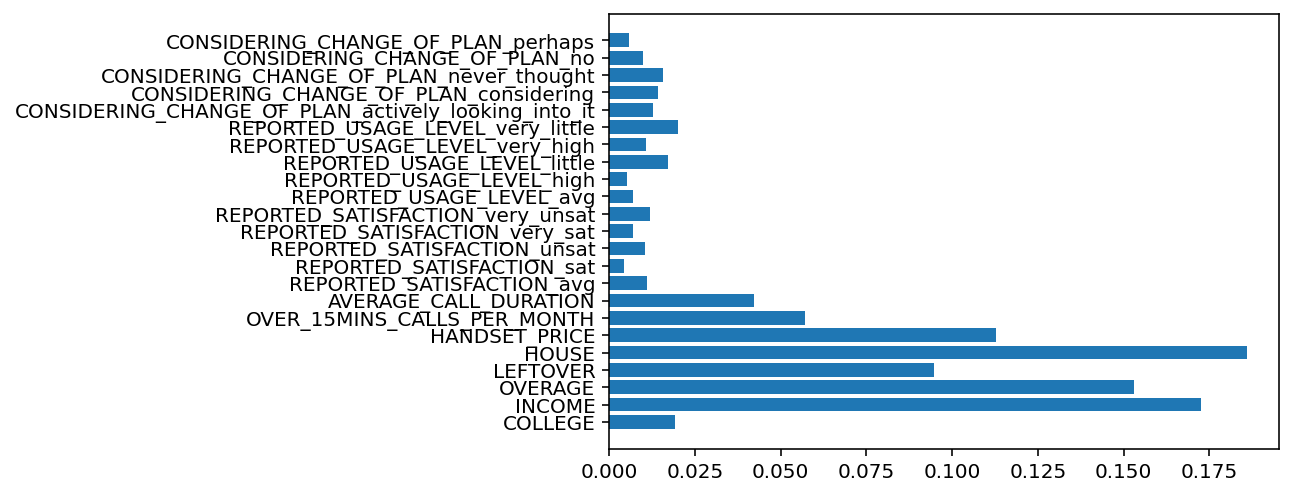

In [49]:
# 중요도 시각화
plt.barh(list(x),model.feature_importances_)
plt.show()


- (의견) 중요도 상위 5개 항목은 예상대로 나왔는데 college가 대부분의 변수들보다 중요도가 높게 나온 것은 의외다.
- (의견) 다만 모델 자체의 정확도(성능)가 낮아서 이를 전적으로 신뢰하기는 어렵다.

### 4.1.4.트리 시각화 #2

1) max_depth=5로 설정해 모델링 2단계~5단계를 수행합니다. accuracy score는 얼마인가요? 0.70

2) max_depth=5로 설정한 모델의 트리를 다시 시각화해 확인합니다.(이미지 바탕화면으로 꺼내 자세히 확인)

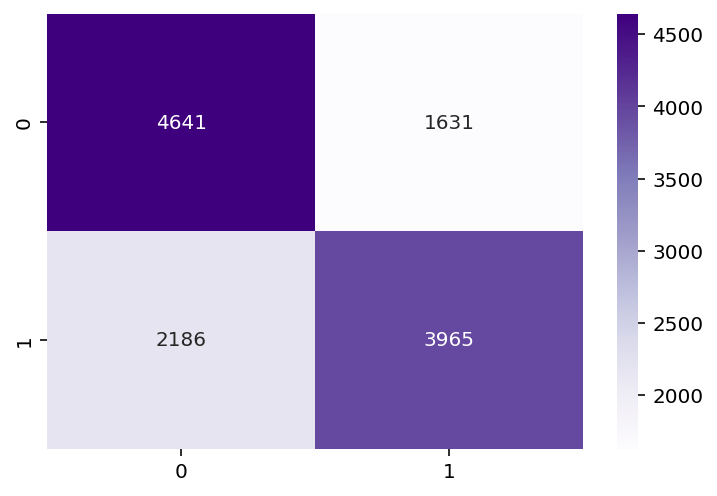

----------------------------------------
              precision    recall  f1-score   support

           0       0.68      0.74      0.71      6272
           1       0.71      0.64      0.68      6151

    accuracy                           0.69     12423
   macro avg       0.69      0.69      0.69     12423
weighted avg       0.69      0.69      0.69     12423

----------------------------------------
Accuracy : 0.6927473235128391


In [54]:
# 5단계: 평가하기(max_depth=5)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# 시각화 자료
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='g',cmap='Purples')
plt.show()
# 수치화 자료
print('-'*40)
print(classification_report(y_test,y_pred))
print('-'*40)
print('Accuracy :',accuracy_score(y_test,y_pred))

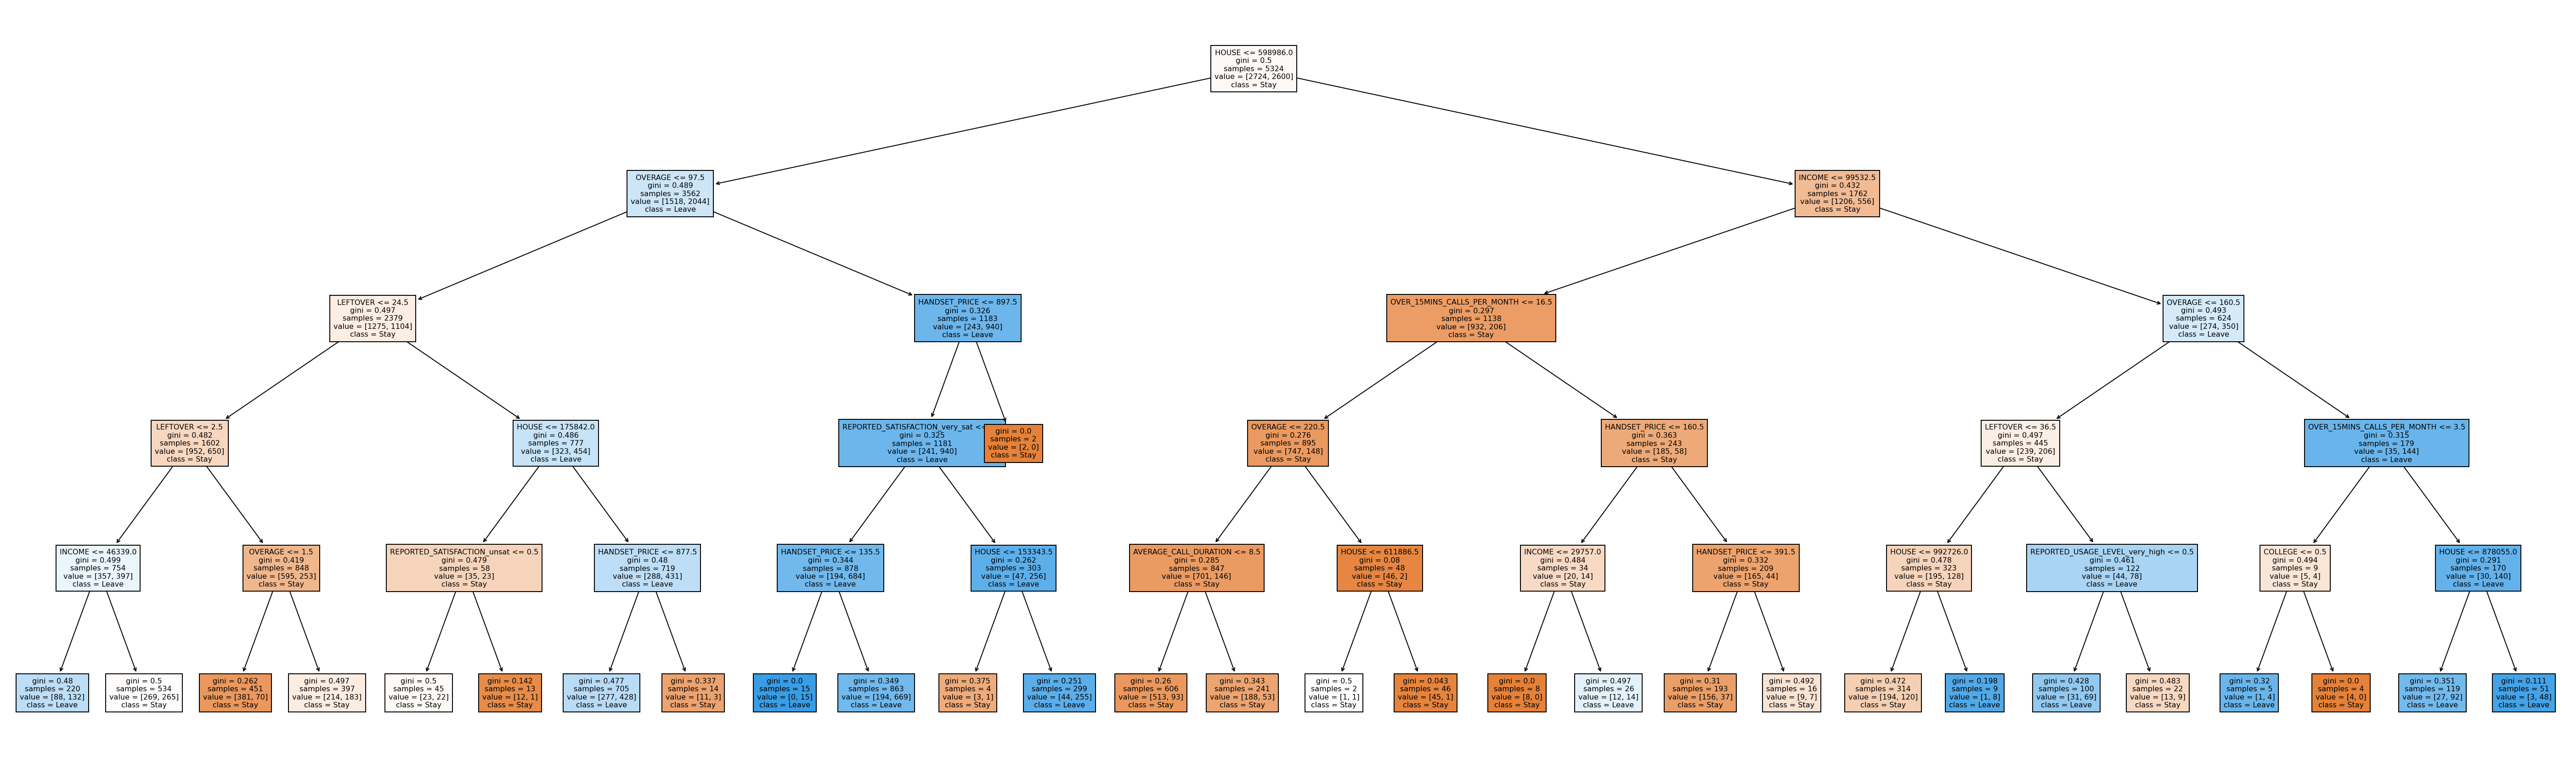

In [55]:
# 트리 시각화
from sklearn.tree import plot_tree

plt.figure(figsize=(50, 15))
plot_tree(model, filled=True, class_names=['Stay', 'Leave'], feature_names=list(x), fontsize=8)
plt.show()

- (의견) 여전히 불순도가 있긴 하지만 이전보다는 많이 좋아졌다.
- (의견) min_samples_left와 min_samples_split을 조정하여 모델 최적화를 시키면 더 좋은 결과가 나올 것 같다.

### 4.1.5.변수 중요도 확인

- 모델의 feature_importances_ 속성으로 변수들(Features) 중요도를 확인합니다.

In [56]:
# 중요도 확인
print(model.feature_importances_)


[0.00435249 0.18854379 0.37251636 0.13065534 0.26312764 0.01898907
 0.00690322 0.00233017 0.         0.         0.00523866 0.0029885
 0.         0.         0.         0.         0.00435476 0.
 0.         0.         0.         0.         0.        ]


- 변수 중요도를 가로막대 그래프로 시각화해 확인합니다.

In [85]:
# 중요도 시각화
plt.barh(list(x),model.feature_importances_)
plt.show()


AttributeError: 'GridSearchCV' object has no attribute 'feature_importances_'

<Figure size 576x864 with 0 Axes>

- (의견) 이전에는 중요도가 어느 정도 있다고 나온 항목(변경 계획, 사용 빈도, 대학 졸업 여부 등)들의 가중치가 매우 떨어졌다.
- (의견) 휴대폰 가격이 이탈여부에 영향을 미치는 가중치가 여전히 상위 5위 이내이긴 하지만 절대적인 수치는 상당히 줄었다.

## 4.2.Random Forest

### 4.2.1.모델링

- Random Forest 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 random_state=2022을 지정합니다.

In [58]:
# 1단계: 불러오기
from sklearn.ensemble import RandomForestClassifier


In [59]:
# 2단계: 선언하기
model = RandomForestClassifier(random_state=2022)

In [60]:
# 3단계: 학습하기
model.fit(x_train, y_train)

RandomForestClassifier(random_state=2022)

In [61]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

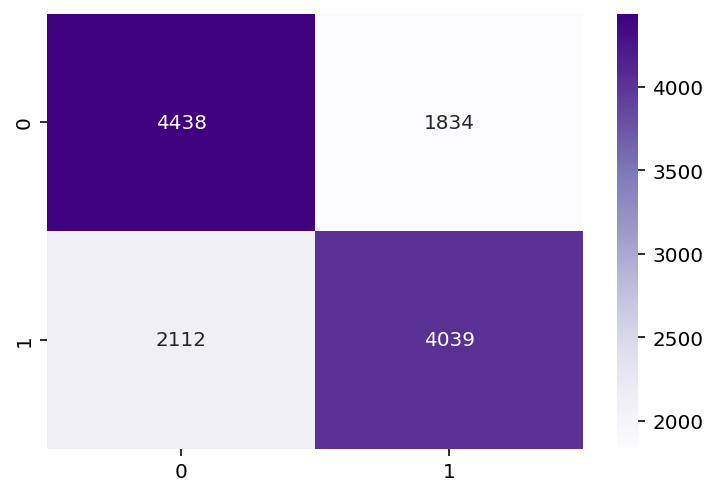

----------------------------------------
              precision    recall  f1-score   support

           0       0.68      0.71      0.69      6272
           1       0.69      0.66      0.67      6151

    accuracy                           0.68     12423
   macro avg       0.68      0.68      0.68     12423
weighted avg       0.68      0.68      0.68     12423

----------------------------------------
Accuracy : 0.6823633582870482


In [62]:
# 5단계: 평가하기
# 시각화 자료
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='g',cmap='Purples')
plt.show()
# 수치화 자료
print('-'*40)
print(classification_report(y_test,y_pred))
print('-'*40)
print('Accuracy :',accuracy_score(y_test,y_pred))


### 4.2.2.변수 중요도 확인

- 모델의 feature_importances_ 속성으로 변수들(Features) 중요도를 확인합니다.

In [63]:
# 중요도 확인
print(model.feature_importances_)
plt.show()

[0.01906406 0.13360023 0.1210179  0.08653447 0.18513331 0.12111661
 0.08968664 0.06815445 0.0094497  0.00592473 0.01259407 0.01256016
 0.01425397 0.00681211 0.00993218 0.01611388 0.01376179 0.01281596
 0.01478476 0.0162119  0.01012321 0.01305311 0.00730079]


- 변수 중요도를 가로막대 그래프로 시각화해 확인합니다.

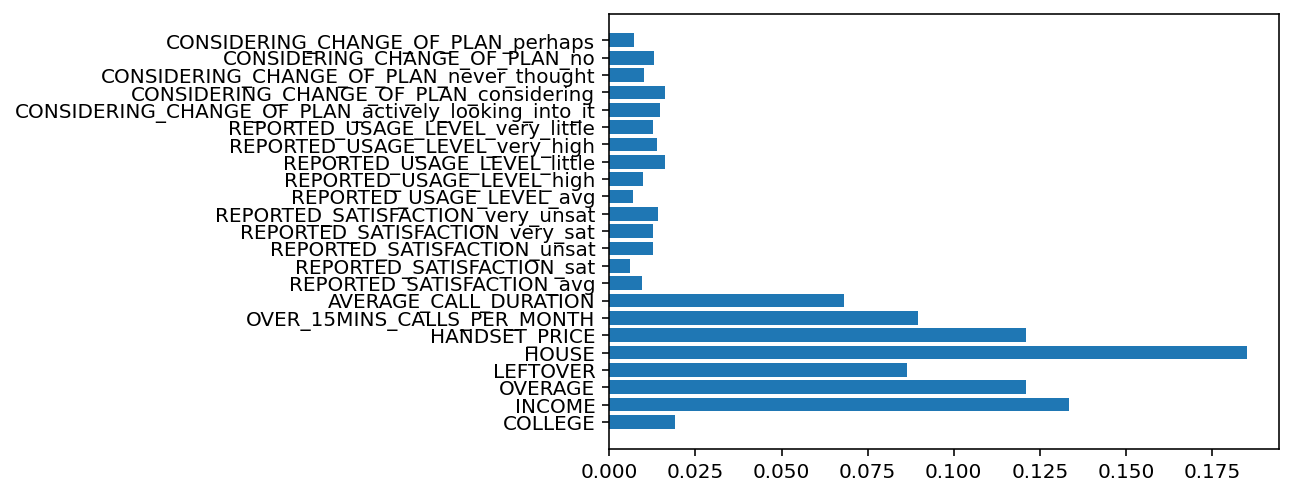

In [64]:
# 중요도 시각화
plt.barh(list(x), model.feature_importances_)
plt.show()


- (의견) Random Forest도 DecisionTree에서 max_depth 설정 안 했을 때랑 비슷한 결과가 나왔다.
- (의견) DecisionTree와 마찬가지로 모델 튜닝 시 예후가 좋을 것 같다.

## 4.3.XGBoost

### 4.3.1. 모델링

- XGBoost 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 random_state=2022를 지정합니다.

In [ ]:
# !pip install xgboost

In [65]:
# 1단계: 불러오기
from xgboost import XGBClassifier


In [86]:
# 2단계: 선언하기
model = XGBClassifier(random_state=2022)

In [87]:
# 3단계: 학습하기
model.fit(x_train, y_train)

[16:29:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=2022,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [88]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

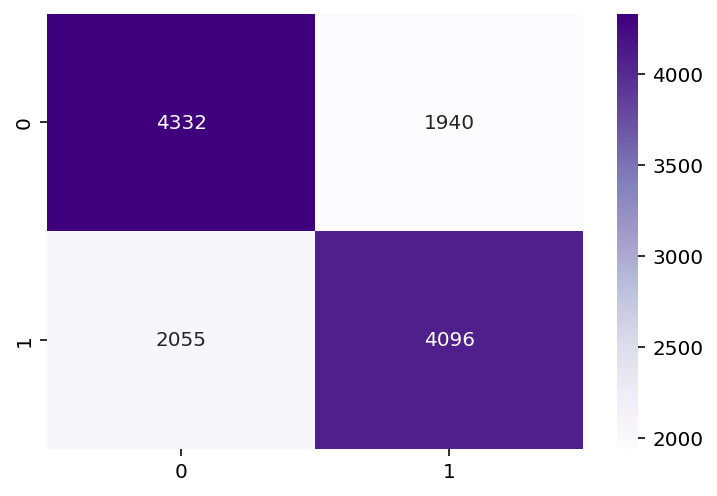

----------------------------------------
              precision    recall  f1-score   support

           0       0.68      0.69      0.68      6272
           1       0.68      0.67      0.67      6151

    accuracy                           0.68     12423
   macro avg       0.68      0.68      0.68     12423
weighted avg       0.68      0.68      0.68     12423

----------------------------------------
Accuracy : 0.678419061418337


In [69]:
# 5단계: 평가하기
# 시각화 자료
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='g',cmap='Purples')
plt.show()
# 수치화 자료
print('-'*40)
print(classification_report(y_test,y_pred))
print('-'*40)
print('Accuracy :',accuracy_score(y_test,y_pred))

### 4.3.2.변수 중요도 확인

- 모델의 feature_importances_ 속성으로 변수들(Features) 중요도를 확인합니다.

In [70]:
# 중요도 확인
print(model.feature_importances_)

[0.03676719 0.05640667 0.09870525 0.05708761 0.05801818 0.03759507
 0.03887053 0.04237752 0.04777844 0.04213446 0.03840696 0.0358921
 0.02832907 0.03413666 0.04059862 0.03052126 0.04021459 0.04452012
 0.04914071 0.02749574 0.04060299 0.03668489 0.03771542]


- 변수 중요도를 가로막대 그래프로 시각화해 확인합니다.

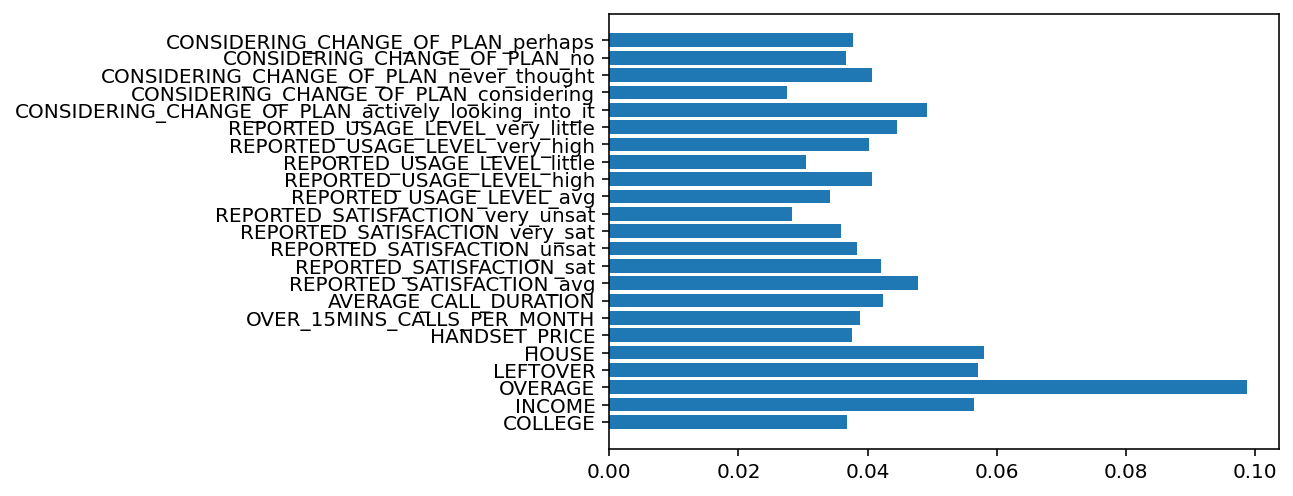

<Figure size 576x864 with 0 Axes>

In [89]:
# 중요도 시각화
plt.barh(list(x), model.feature_importances_)
plt.figure(figsize=[8,12])
plt.show()

- (의견) XG부스트가 학습 과정에서 설문조사 결과 때문에 예측에 실패한 경우가 많았던 것 같다.
- (의견) 사람들이 설문조사를 할 때 실제 행동과 다른 의견을 제출한 경우가 많은 것 같다.
- (의견) 위 가설이 맞다면, 설문조사 전후로 어떤 심리적인 상호작용 및 변화가 생기는지 관찰할 필요가 있다.

# 5.정리

- (의견) 실용적인 목적으로 사용하기에는 모델들의 성능이 좋지 않다.
- (의견) 다만 파라미터 조절(튜닝)을 통해 성능이 상당히 개선될 수 있는 여지가 있다.
- (의견) 데이터를 전처리한 후 세분화된 데이터 별로 모델링을 하면 더 높은 정확도가 나올지도 모른다.
- (의견) 모델 최적화 및 예측도 향상 과정에서 설문조사 결과들(이탈 계획, 서비스 만족도, 이용 시간)의 데이터를 의도적으로 배제하는 게 나을 것 같다.

- (의견) 초과 이용시간, 집값, 잔여 시간, 수입은 강한 상관관계가 있음이 유력하다.

# 6.(옵션) 성능 튜닝

- 위 모델 중 하나를 선택해 Grid Search 또는 Random Search를 사용해 성능을 높여봅니다.

In [74]:
# RandomForest 튜닝(라이브러리 불러오기 및 변수 지정)
from sklearn.model_selection import RandomizedSearchCV
rd_model = RandomForestClassifier()
rd_params = {'max_depth': range(3,51),'min_samples_leaf':range(2,21),'min_samples_split':range(2,21)}

# 모델 정의
model = RandomizedSearchCV(rd_model, rd_params, cv=10, scoring='accuracy', n_iter=100)

# 모델 학습
model.fit(x_train, y_train)

#모델 예측 및 평가
y_pred = model.predict(x_test)
print('Accuracy :',accuracy_score(y_test,y_pred))

Accuracy : 0.6979795540529663


In [90]:
# RandomForest 튜닝(라이브러리 불러오기 및 변수 지정)
from sklearn.model_selection import GridSearchCV
gd_model = RandomForestClassifier()
gd_params = {'n_estimators':range(100,201,10),'max_depth': range(40,51),'min_samples_leaf':range(10,21),
             'min_samples_split':range(2,11),'max_features':range(20,201,10)}

# 모델 정의
model = GridSearchCV(gd_model, gd_params, cv=10, scoring='accuracy')

# 모델 학습
model.fit(x_train, y_train)

#모델 예측 및 평가
y_pred = model.predict(x_test)
print('Accuracy :',accuracy_score(y_test,y_pred))

KeyboardInterrupt: 

In [75]:
# 최상의 파라미터
model.best_estimator_

RandomForestClassifier(max_depth=47, min_samples_leaf=18, min_samples_split=8)

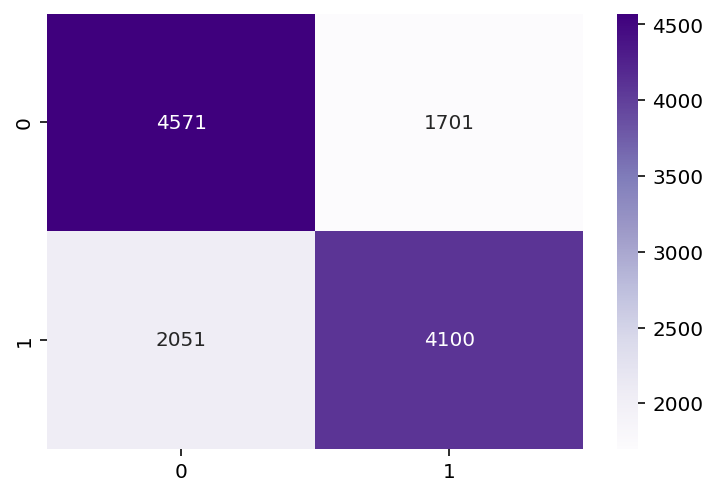

In [76]:
# 시각화
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='g', cmap='Purples')
plt.show()